### <font color='red'> Project 3 : Buzz Prediction on Twitter

Project Description:
- Use same datasets as Project 2.
- Run all the models only on 10% data. Use code given in Project 2 for sampling.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply four voting classifiers - two with hard voting and two with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project3_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project3_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project3_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

### Packages import and setting up of dataframe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score
import seaborn as sns

In [2]:
columns =['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6','AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6','AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','Annotation']

In [3]:
classi_df = pd.read_csv('Twitter-Absolute-Sigma-500.data',header=None,names=columns,index_col=False)

### Extracting features and target from dataframe

In [4]:
x = classi_df.iloc[:,:-1]
y = classi_df['Annotation']

In [5]:
y.value_counts()

0.0    112932
1.0     27775
Name: Annotation, dtype: int64

### Exploration of Dataset

-  #### Description of Dataset

In [6]:
classi_df.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Annotation
count,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,...,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000
mean,172.279823,155.150625,165.464476,176.820549,186.937700,216.209208,243.866510,87.050154,78.639236,84.269574,...,1.113444,1.196131,172.838807,155.630878,165.938674,177.314810,187.463794,216.776294,244.479194,0.197396
std,509.872276,471.573236,495.360236,528.351277,560.331281,632.188378,707.402192,234.731748,218.448179,233.536510,...,1.374287,1.826150,510.937549,472.462733,496.233557,529.286514,561.309487,633.203935,708.436795,0.398035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,6.000000,0.000000
50%,22.000000,19.000000,20.000000,22.000000,23.000000,28.000000,33.000000,13.000000,11.000000,13.000000,...,1.000000,1.000000,22.000000,19.000000,21.000000,22.000000,23.000000,28.000000,33.000000,0.000000
75%,125.000000,112.000000,119.000000,126.000000,133.000000,161.000000,186.000000,70.000000,64.000000,67.000000,...,1.100000,1.119048,126.000000,113.000000,119.000000,127.000000,134.000000,162.000000,187.000000,0.000000
max,24210.000000,22899.000000,20495.000000,27007.000000,30957.000000,28603.000000,37505.000000,15105.000000,15730.000000,16389.000000,...,185.666672,295.000000,24301.000000,22980.000000,20495.000000,27071.000000,31028.000000,28697.000000,37505.000000,1.000000


-  #### Check for NULL values

In [7]:
classi_df.isnull().values.any()

False

No missing values in the dataset

-  #### Check for skewness in data

In [8]:
dataregcols = list(classi_df.columns)

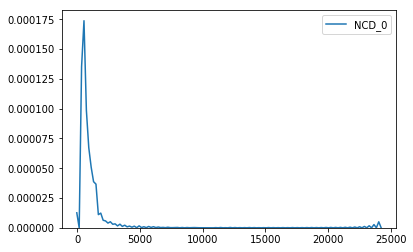

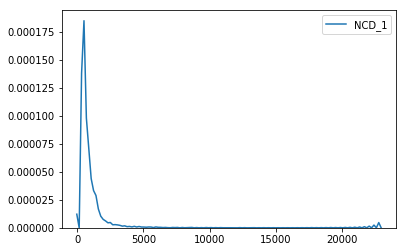

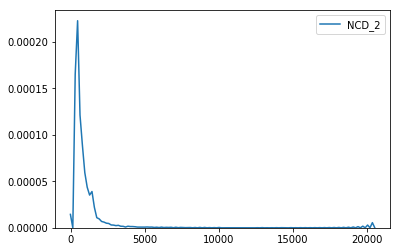

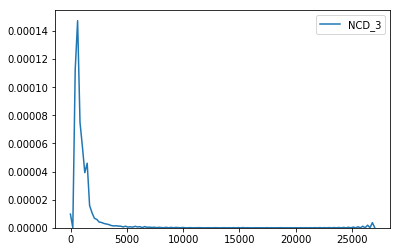

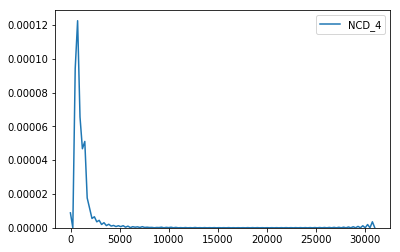

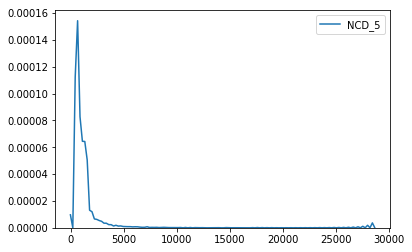

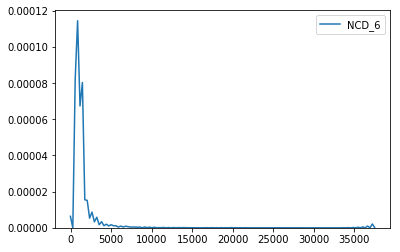

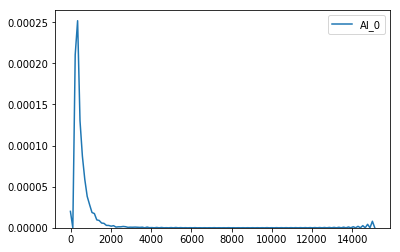

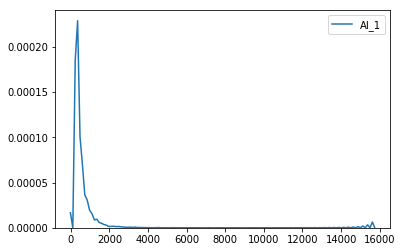

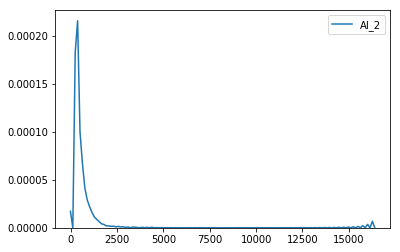

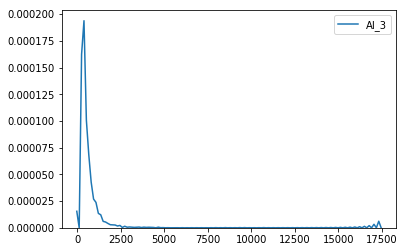

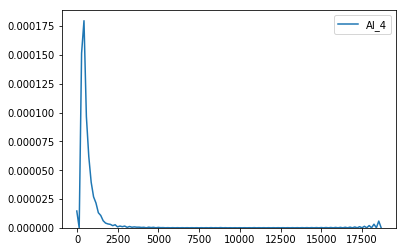

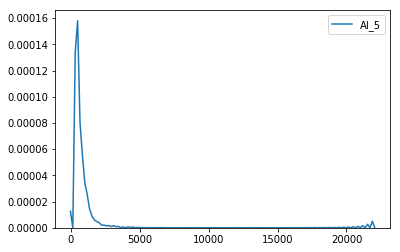

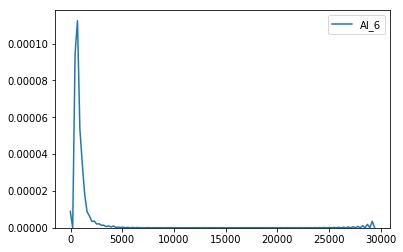

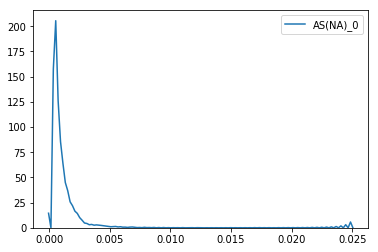

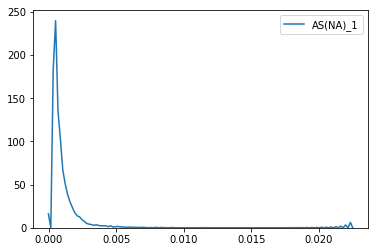

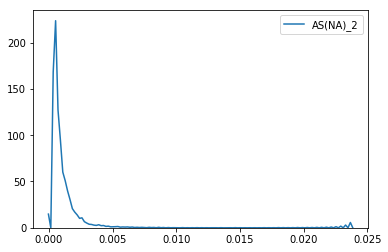

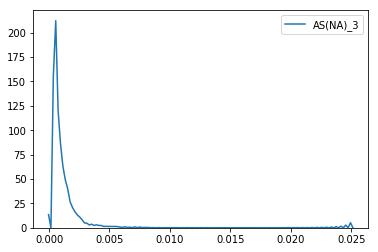

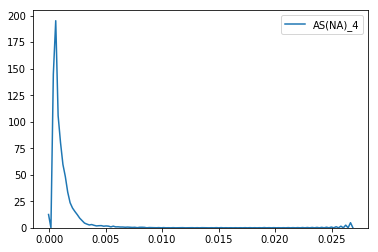

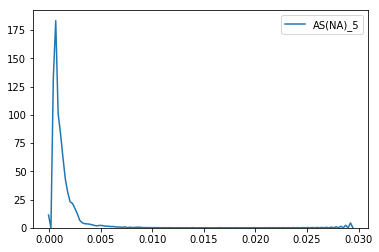

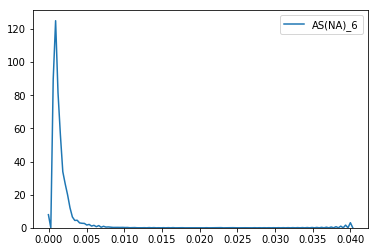

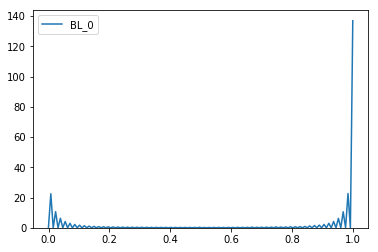

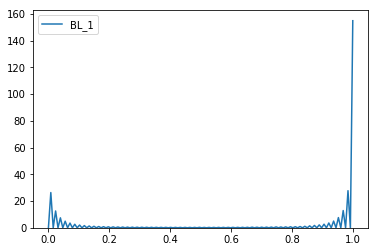

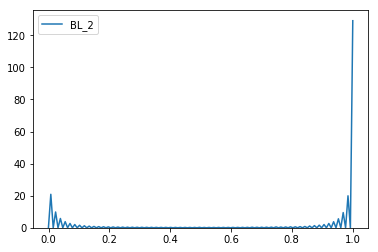

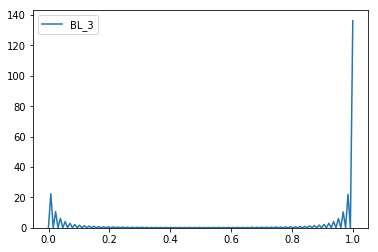

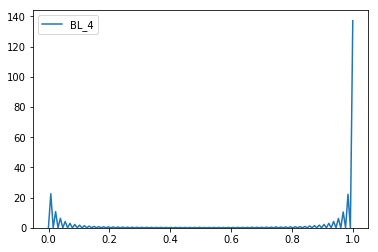

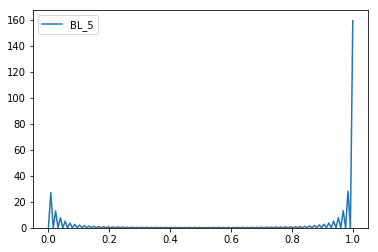

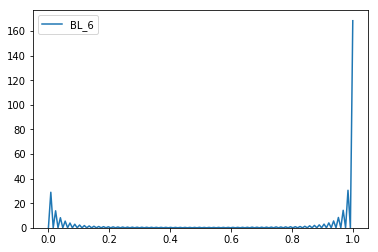

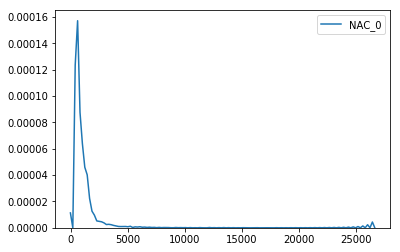

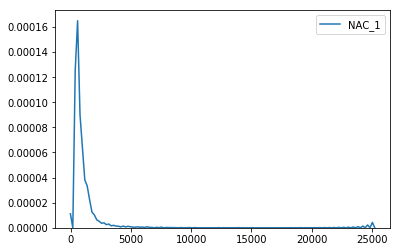

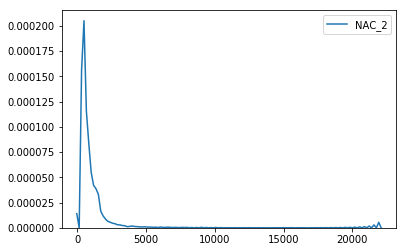

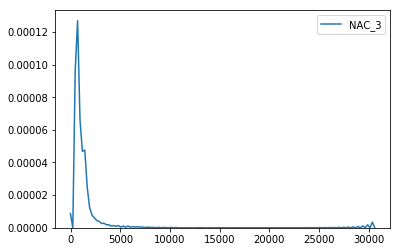

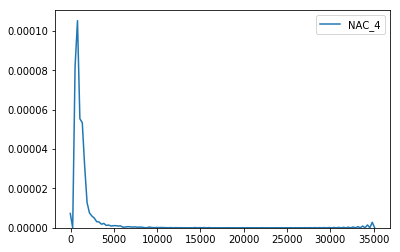

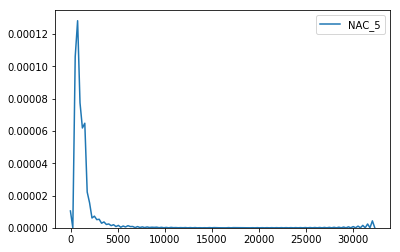

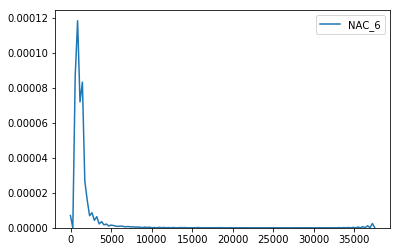

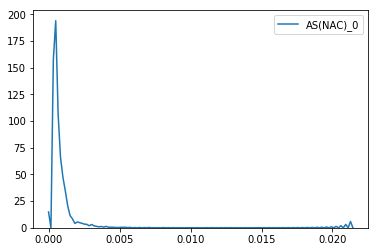

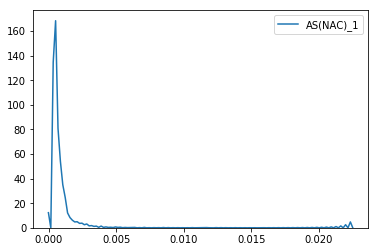

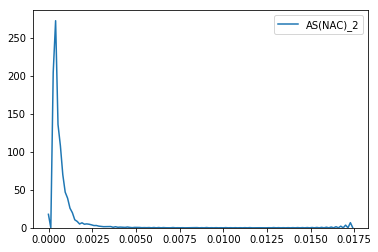

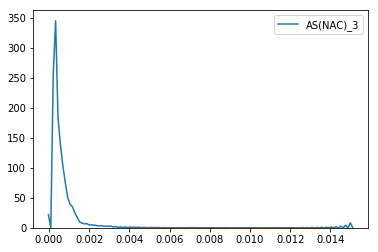

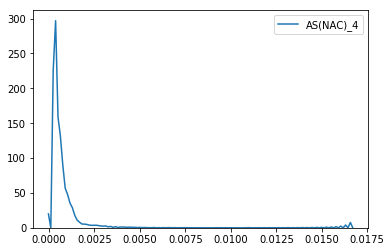

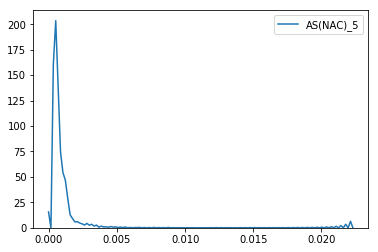

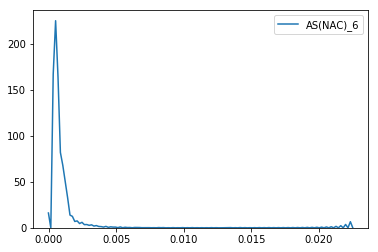

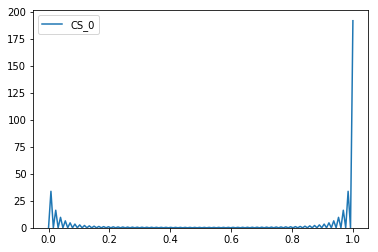

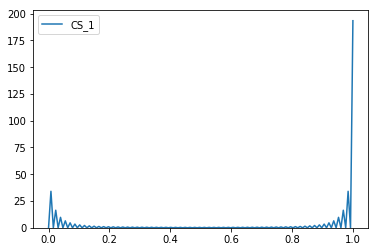

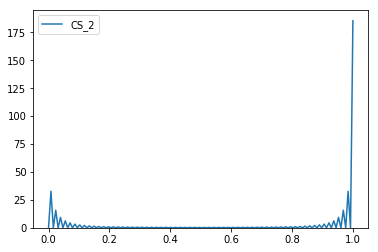

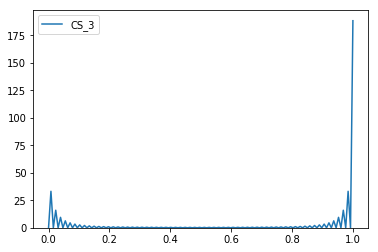

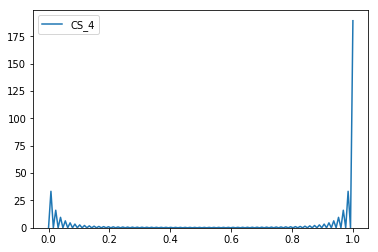

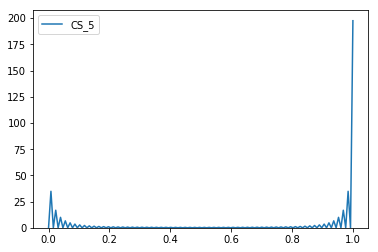

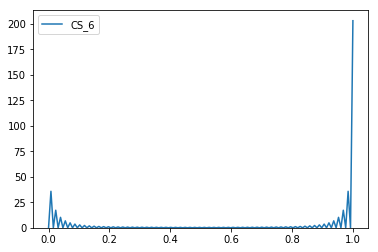

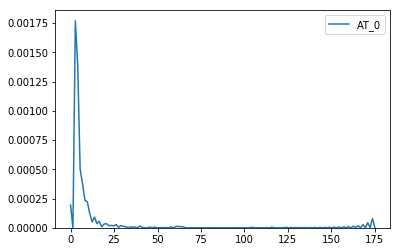

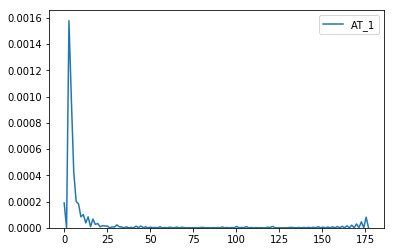

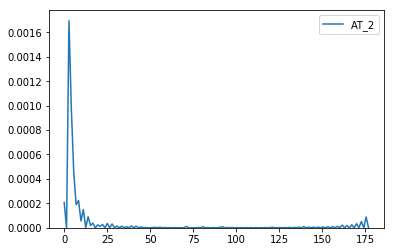

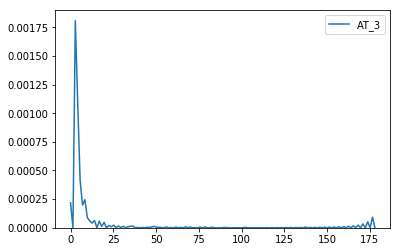

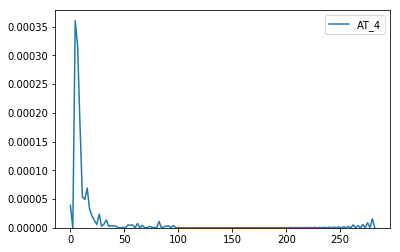

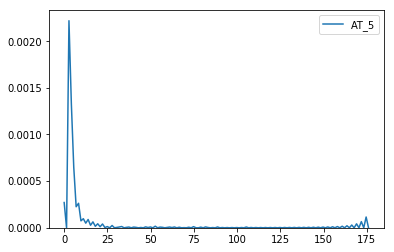

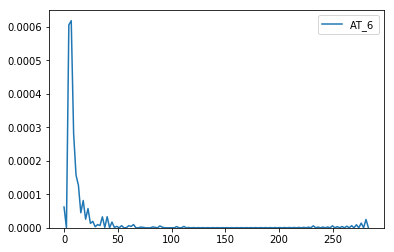

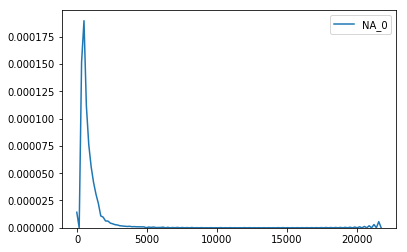

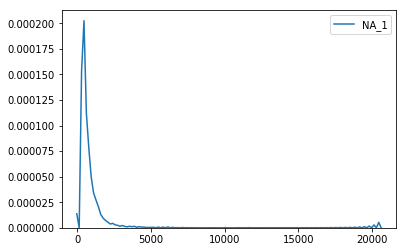

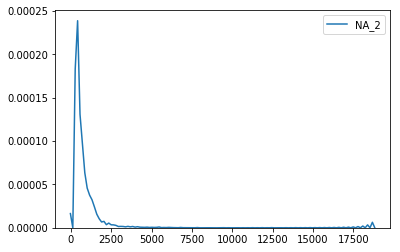

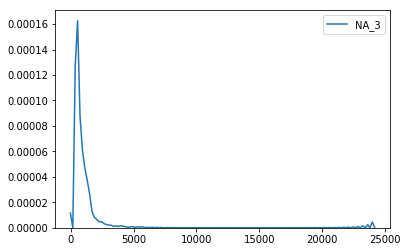

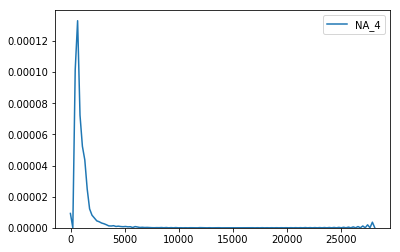

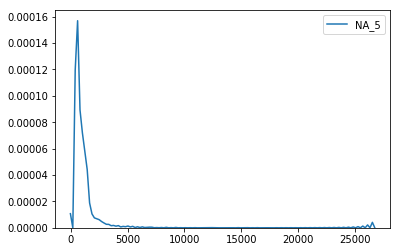

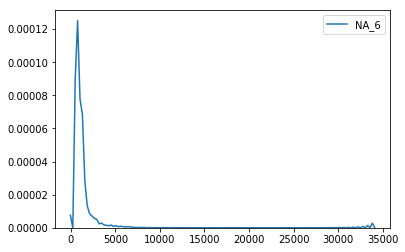

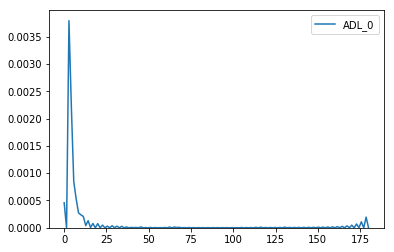

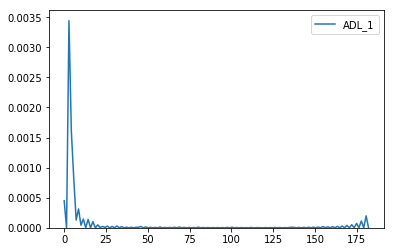

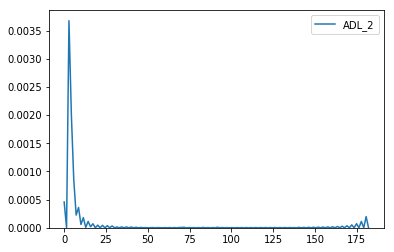

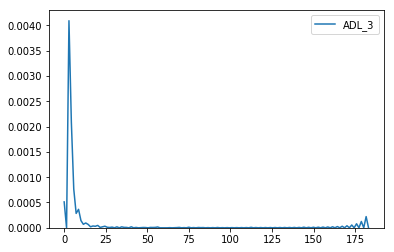

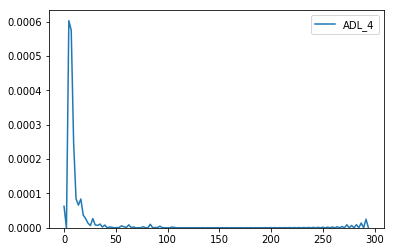

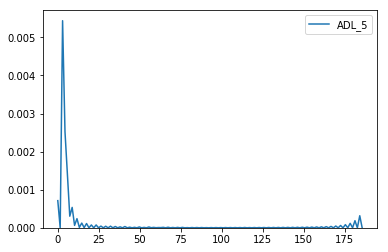

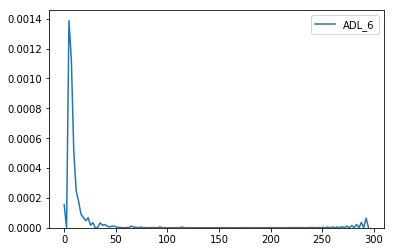

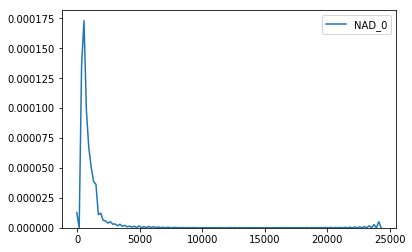

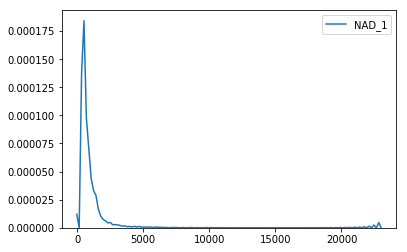

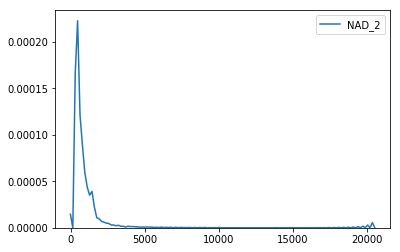

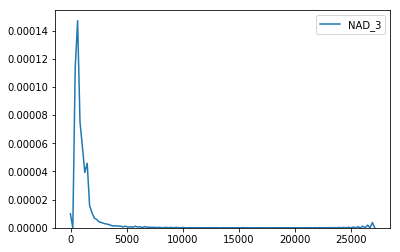

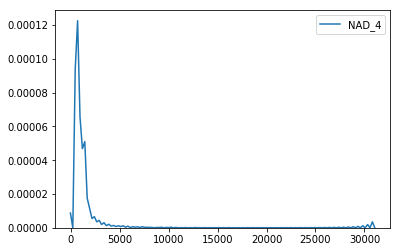

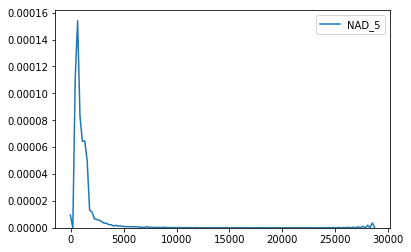

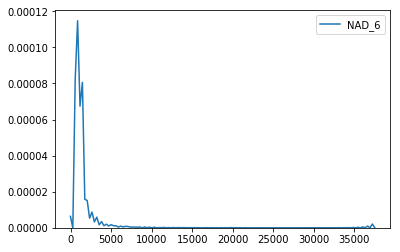

In [9]:
for i in dataregcols:
    if i!="Annotation":
        sns.kdeplot(classi_df[i])
        plt.show()

Plots indicate the presence of skewness in data

-  #### Distribution of Buzz in the dataset

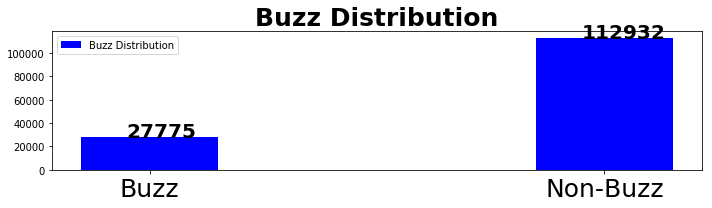

In [10]:
classi_df['BuzzFlag'] = ['Non-Buzz' if val ==0 else ('Buzz') for val in classi_df['Annotation']]
df_summ = classi_df['BuzzFlag'].value_counts().sort_values(ascending=True)
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111,facecolor='white')
index = classi_df['BuzzFlag'].unique()
y_pos = np.arange(len(index))
bar_width=0.3
plt.bar(y_pos,df_summ.values,bar_width,color='blue',label='Buzz Distribution')
for i,j in zip(y_pos,df_summ.values):
    ax.annotate(str(j),xy=(i-0.05,j),color='black',weight='bold', fontsize=20)
plt.title("Buzz Distribution",fontsize=25,weight='bold')
plt.xticks(y_pos,index, fontsize=25)
plt.tight_layout()
plt.legend()
plt.show()

As seen from the plot, dependent variable which indicates the buzz is imbalanced as the count of Non-Buzz instances is very high than the number of Buzz instances

### Evaluation Strategy

- ROC_AUC_Score: The dataset is imbalanced. Thus ROC_AUC_Score would be an appropriate evaluation strategy. 
- ROC curve plots true positive rate versus false positive rate for all classification thresholds ranging from 0 to 1
- AUC metric computes the probability that a classifier will rank randomly chosen positive observation higher than randomly   
  chosen negative observation and thus serves as a good evaluation metric for imbalanced dataset.

### Extracting 10% of data with shuffling

In [11]:
from sklearn.model_selection import train_test_split

_, part_data, _, part_target = train_test_split(x, y, shuffle = True, test_size = 0.1, random_state = 8)

In [12]:
part_target.value_counts()

0.0    11339
1.0     2732
Name: Annotation, dtype: int64

### Creating Train-Test Split


In [13]:
x_train_part, x_test_part, y_train, y_test = train_test_split(part_data, part_target, test_size=0.2, random_state = 8)

### Scaling

MinMax scaler is used to make the data consistent in such a way that all data is brought into the range of 0 to 1. It does not remove the skewness in the data. But it reduces it

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train_part)
x_test = scaler.transform(x_test_part)

### Hard Voting

Hard voting uses predicted class labels for majority rule voting. Hard voting is the simplest case of majority voting. We predict the class label via majority (plurality) voting of each classifier.

### Hard Voting Classifier - 1

In [15]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [16]:
log_clf_hv = LogisticRegression(C=10, penalty='l1', random_state = 8)
log_clf_hv.fit(x_train, y_train)

knn_clf_hv = KNeighborsClassifier(10)
knn_clf_hv.fit(x_train, y_train)

svc_clf_hv = LinearSVC(C=10)
svc_clf_hv.fit(x_train, y_train)

voting_clf_hv = VotingClassifier(estimators=[('lr', log_clf_hv), ('knn', knn_clf_hv),('svc', svc_clf_hv)], voting='hard')
voting_clf_hv.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=8, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('knn', KNeighbors...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [17]:
from sklearn.metrics import accuracy_score

for clf in (log_clf_hv, knn_clf_hv, svc_clf_hv, voting_clf_hv):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9651865008880994
KNeighborsClassifier 0.9595026642984015
LinearSVC 0.9634103019538188
VotingClassifier 0.9655417406749556


C:\Users\sachi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [18]:
from sklearn.metrics import roc_auc_score

for clf in (log_clf_hv, knn_clf_hv, svc_clf_hv, voting_clf_hv):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, roc_auc_score(y_test, y_pred))

LogisticRegression 0.9343524200695035
KNeighborsClassifier 0.9215432007283043
LinearSVC 0.9318980222665146
VotingClassifier 0.9345777467932529


C:\Users\sachi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Hard Voting Classifier - 2

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
log_clf_hv = LogisticRegression(C=10, penalty='l1', random_state = 8)
log_clf_hv.fit(x_train, y_train)

knn_clf_hv = KNeighborsClassifier(10)
knn_clf_hv.fit(x_train, y_train)

dt_clf_hv = DecisionTreeClassifier(max_depth = 4, max_features = 5)
dt_clf_hv.fit(x_train, y_train)

voting_clf_hv = VotingClassifier(estimators=[('lr', log_clf_hv), ('knn', knn_clf_hv),('dt', dt_clf_hv)], voting='hard')
voting_clf_hv.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=8, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('knn', KNeighbors...it=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [21]:
from sklearn.metrics import accuracy_score

for clf in (log_clf_hv, knn_clf_hv, dt_clf_hv, voting_clf_hv):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9651865008880994
KNeighborsClassifier 0.9595026642984015
DecisionTreeClassifier 0.9577264653641208
VotingClassifier 0.963765541740675


C:\Users\sachi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [22]:
from sklearn.metrics import roc_auc_score

for clf in (log_clf_hv, knn_clf_hv, dt_clf_hv, voting_clf_hv):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, roc_auc_score(y_test, y_pred))

LogisticRegression 0.9343524200695035
KNeighborsClassifier 0.9215432007283043
DecisionTreeClassifier 0.9249994707090381
VotingClassifier 0.9326121870000089


C:\Users\sachi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Soft Voting

Soft voting predicts the class label based on the argmax of the sums of the predicted probabilities. In soft voting, we predict the class labels based on the predicted probabilities for classifier. This approach is only recommended if the classifiers are well-calibrated.

### Soft Voting Classifier - 1

In [23]:
from sklearn.svm import SVC

In [24]:
log_clf_sv = LogisticRegression(C=10, penalty='l1', random_state = 8)
log_clf_sv.fit(x_train, y_train)

knn_clf_sv = KNeighborsClassifier(10)
knn_clf_sv.fit(x_train, y_train)

svc_clf_sv = SVC(kernel = 'linear', probability=True, random_state = 8)
svc_clf_sv.fit(x_train, y_train)

voting_clf_sv = VotingClassifier(estimators=[('lr', log_clf_sv), ('knn', knn_clf_sv),('svc', svc_clf_sv)], voting='soft')
voting_clf_sv.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=8, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('knn', KNeighbors...ear',
  max_iter=-1, probability=True, random_state=8, shrinking=True, tol=0.001,
  verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [25]:
for clf in (log_clf_sv, knn_clf_sv, svc_clf_sv, voting_clf_sv):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9651865008880994
KNeighborsClassifier 0.9595026642984015
SVC 0.9587921847246892
VotingClassifier 0.9655417406749556


C:\Users\sachi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [26]:
for clf in (log_clf_sv, knn_clf_sv, svc_clf_sv, voting_clf_sv):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, roc_auc_score(y_test, y_pred))

LogisticRegression 0.9343524200695035
KNeighborsClassifier 0.9215432007283043
SVC 0.9192517489285639
VotingClassifier 0.9388729429484834


C:\Users\sachi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Soft Voting Classifier - 2

In [27]:
log_clf_hv = LogisticRegression(C=10, penalty='l1', random_state = 8)
log_clf_hv.fit(x_train, y_train)

knn_clf_hv = KNeighborsClassifier(10)
knn_clf_hv.fit(x_train, y_train)

dt_clf_hv = DecisionTreeClassifier(max_depth = 4, max_features = 5)
dt_clf_hv.fit(x_train, y_train)

voting_clf_hv = VotingClassifier(estimators=[('lr', log_clf_hv), ('knn', knn_clf_hv),('dt', dt_clf_hv)], voting='soft')
voting_clf_hv.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=8, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('knn', KNeighbors...it=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [28]:
for clf in (log_clf_sv, knn_clf_sv, dt_clf_hv, voting_clf_sv):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9651865008880994
KNeighborsClassifier 0.9595026642984015
DecisionTreeClassifier 0.9587921847246892
VotingClassifier 0.9655417406749556


C:\Users\sachi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [29]:
for clf in (log_clf_sv, knn_clf_sv, dt_clf_hv, voting_clf_sv):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, roc_auc_score(y_test, y_pred))

LogisticRegression 0.9343524200695035
KNeighborsClassifier 0.9215432007283043
DecisionTreeClassifier 0.9325879908417541
VotingClassifier 0.9388729429484834


C:\Users\sachi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Bagging

Bagging (stands for Bootstrap Aggregating) is a way to decrease the variance of your prediction by generating additional data for training from your original dataset using combinations with repetitions to produce multisets of the same cardinality/size as your original data. By increasing the size of your training set you can't improve the model predictive force, but just decrease the variance, narrowly tuning the prediction to expected outcome.

### Bagging - Logistic Regression

In [30]:
from sklearn.ensemble import BaggingClassifier

In [31]:
logr_clf= LogisticRegression(C = 10, penalty = 'l1', random_state=8)
bag_clf_logr = BaggingClassifier(logr_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=8)

bag_clf_logr.fit(x_train, y_train)
y_pred = bag_clf_logr.predict(x_test)

In [32]:
print('Logistic Regression Classifier (Bagging) - Train Accuracy: {:.2f}'.format(bag_clf_logr.score(x_train, y_train)))
print('Logistic Regression Classifier (Bagging) - Test Accuracy: {:.2f}'.format(bag_clf_logr.score(x_test, y_test)))

Logistic Regression Classifier (Bagging) - Train Accuracy: 0.92
Logistic Regression Classifier (Bagging) - Test Accuracy: 0.92


In [33]:
logr_auc_train = roc_auc_score(y_train,bag_clf_logr.predict(x_train))
logr_auc_test = roc_auc_score(y_test,bag_clf_logr.predict(x_test))

In [34]:
print('Logistic Regression Classifier (Bagging)  - Train ROC AUC: {:.2f}'.format(logr_auc_train))
print('Logistic Regression Classifier (Bagging) - Test ROC AUC: {:.2f}'.format(logr_auc_test))

Logistic Regression Classifier (Bagging)  - Train ROC AUC: 0.81
Logistic Regression Classifier (Bagging) - Test ROC AUC: 0.82


### Bagging - KNN Classifier 

In [35]:
knn_clf= KNeighborsClassifier(n_neighbors = 10)
bag_clf_knn = BaggingClassifier(knn_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=8)

bag_clf_knn.fit(x_train, y_train)
y_pred = bag_clf_knn.predict(x_test)

In [36]:
print('KNN Classifier (Bagging) - Train Accuracy: {:.2f}'.format(bag_clf_knn.score(x_train, y_train)))
print('KNN Classifier (Bagging) - Test Accuracy: {:.2f}'.format(bag_clf_knn.score(x_test, y_test)))

KNN Classifier (Bagging) - Train Accuracy: 0.95
KNN Classifier (Bagging) - Test Accuracy: 0.95


In [37]:
knn_auc_train = roc_auc_score(y_train,bag_clf_knn.predict(x_train))
knn_auc_test = roc_auc_score(y_test,bag_clf_knn.predict(x_test))

In [38]:
print('Logistic Regression (Bagging) - Train ROC AUC: {:.2f}'.format(knn_auc_train))
print('Logistic Regression (Bagging) - Test ROC AUC: {:.2f}'.format(knn_auc_test))

Logistic Regression (Bagging) - Train ROC AUC: 0.88
Logistic Regression (Bagging) - Test ROC AUC: 0.89


### Pasting

Pasting is same as bagging -  only difference being that pasting doesn’t allow training instances to be sampled several times for the same predictors.

### Pasting - Logistic Regression

In [39]:
logr_clf= LogisticRegression(C = 10, penalty = 'l1', random_state=8)
paste_clf_logr = BaggingClassifier(logr_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=8)

paste_clf_logr.fit(x_train, y_train)
y_pred = paste_clf_logr.predict(x_test)

In [40]:
print('Logistic Regression Classifier (Pasting) - Train Accuracy: {:.2f}'.format(paste_clf_logr.score(x_train, y_train)))
print('Logistic Regression Classifier (Pasting) - Test Accuracy: {:.2f}'.format(paste_clf_logr.score(x_test, y_test)))

Logistic Regression Classifier (Pasting) - Train Accuracy: 0.92
Logistic Regression Classifier (Pasting) - Test Accuracy: 0.92


In [41]:
logr_auc_train = roc_auc_score(y_train,paste_clf_logr.predict(x_train))
logr_auc_test = roc_auc_score(y_test,paste_clf_logr.predict(x_test))

In [42]:
print('Logistic Regression (Pasting) - Train ROC AUC: {:.2f}'.format(logr_auc_train))
print('Logistic Regression (Pasting) - Test ROC AUC: {:.2f}'.format(logr_auc_test))

Logistic Regression (Pasting) - Train ROC AUC: 0.81
Logistic Regression (Pasting) - Test ROC AUC: 0.82


### Pasting - KNN Classifier

In [43]:
knn_clf= KNeighborsClassifier(n_neighbors = 10)
paste_clf_knn = BaggingClassifier(knn_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=8)

paste_clf_knn.fit(x_train, y_train)
y_pred = paste_clf_knn.predict(x_test)

In [44]:
print('KNN Classifier (Pasting) - Train Accuracy: {:.2f}'.format(paste_clf_knn.score(x_train, y_train)))
print('KNN Classifier (Pasting) - Test Accuracy: {:.2f}'.format(paste_clf_knn.score(x_test, y_test)))

KNN Classifier (Pasting) - Train Accuracy: 0.95
KNN Classifier (Pasting) - Test Accuracy: 0.95


In [45]:
knn_auc_train = roc_auc_score(y_train,paste_clf_knn.predict(x_train))
knn_auc_test = roc_auc_score(y_test,paste_clf_knn.predict(x_test))

In [46]:
print('Logistic Regression (Pasting) - Train ROC AUC: {:.2f}'.format(knn_auc_train))
print('Logistic Regression (Pasting) - Test ROC AUC: {:.2f}'.format(knn_auc_test))

Logistic Regression (Pasting) - Train ROC AUC: 0.88
Logistic Regression (Pasting) - Test ROC AUC: 0.89


### Ada-Boost

Ada-boost classifier combines weak classifier algorithm to form strong classifier. 

Ada-boost
1. Retrains the algorithm iteratively by choosing the training set based on accuracy of previous training.
2. The weight-age of each trained classifier at any iteration depends on the accuracy achieved.

### Ada Boost - Logistic Regression

In [47]:
from sklearn.ensemble import AdaBoostClassifier

In [48]:
logr_clf= LogisticRegression(C = 10, penalty = 'l1', random_state=8)
adab_clf_logr = AdaBoostClassifier(logr_clf, n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=8)
adab_clf_logr.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=8, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=0.5, n_estimators=200, random_state=8)

In [49]:
print('Logistic Regression Classifier (Ada Boost) - Train Accuracy: {:.2f}'.format(adab_clf_logr.score(x_train, y_train)))
print('Logistic Regression Classifier (Ada Boost) - Test Accuracy: {:.2f}'.format(adab_clf_logr.score(x_test, y_test)))

Logistic Regression Classifier (Ada Boost) - Train Accuracy: 0.81
Logistic Regression Classifier (Ada Boost) - Test Accuracy: 0.79


In [50]:
logr_auc_train = roc_auc_score(y_train,adab_clf_logr.predict(x_train))
logr_auc_test = roc_auc_score(y_test,adab_clf_logr.predict(x_test))

In [51]:
print('Logistic Regression (Ada Boost) - Train ROC AUC: {:.2f}'.format(knn_auc_train))
print('Logistic Regression (Ada Boost) - Test ROC AUC: {:.2f}'.format(knn_auc_test))

Logistic Regression (Ada Boost) - Train ROC AUC: 0.88
Logistic Regression (Ada Boost) - Test ROC AUC: 0.89


### Ada Boost - Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt_clf= DecisionTreeClassifier(max_depth = 4, max_features = 5, random_state=8)
adab_clf_dt = AdaBoostClassifier(dt_clf, n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=8)
adab_clf_dt.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=8, splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=8)

In [54]:
print('Decision Tree Classifier (Ada Boost) - Train Accuracy: {:.2f}'.format(adab_clf_dt.score(x_train, y_train)))
print('Decision Tree Classifier (Ada Boost) - Test Accuracy: {:.2f}'.format(adab_clf_dt.score(x_test, y_test)))

Decision Tree Classifier (Ada Boost) - Train Accuracy: 1.00
Decision Tree Classifier (Ada Boost) - Test Accuracy: 0.96


In [55]:
dt_auc_train = roc_auc_score(y_train,adab_clf_dt.predict(x_train))
dt_auc_test = roc_auc_score(y_test,adab_clf_dt.predict(x_test))

In [56]:
print('Logistic Regression (Ada Boost) - Train ROC AUC: {:.2f}'.format(dt_auc_train))
print('Logistic Regression (Ada Boost) - Test ROC AUC: {:.2f}'.format(dt_auc_test))

Logistic Regression (Ada Boost) - Train ROC AUC: 1.00
Logistic Regression (Ada Boost) - Test ROC AUC: 0.93


### Gradient Boosting

Similar to AdaBoost, Gradient Boosting also works with successive predictive models added to the ensemble. Instead of updating the weights of the training instances like AdaBoost, Gradient Boosting fits the new model to the residual errors.

Gradient Boosting
1. Fit a model to the given Training set. 
2. Calculate the Residual Errors which become the new training instances. 
3. A new model is trained on these and so on. 
4. An addition of all the models is selected for making predictions.

In [57]:
from  sklearn.ensemble import GradientBoostingClassifier

In [58]:
gbc = GradientBoostingClassifier(random_state=8)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=8, subsample=1.0, verbose=0,
              warm_start=False)

In [59]:
print('Gradient Boost Classifier - Train Accuracy: {:.2f}'.format(gbc.score(x_train, y_train)))
print('Gradient Boost Classifier - Test Accuracy: {:.2f}'.format(gbc.score(x_test, y_test)))

Gradient Boost Classifier - Train Accuracy: 0.98
Gradient Boost Classifier - Test Accuracy: 0.96


In [60]:
gbc_auc_train = roc_auc_score(y_train,gbc.predict(x_train))
gbc_auc_test = roc_auc_score(y_test,gbc.predict(x_test))

In [61]:
print('Logistic Regression - Train ROC AUC: {:.2f}'.format(gbc_auc_train))
print('Logistic Regression - Test ROC AUC: {:.2f}'.format(gbc_auc_test))

Logistic Regression - Train ROC AUC: 0.96
Logistic Regression - Test ROC AUC: 0.94


### Principal Component Analysis

Principal Component Analysis (PCA) simplifies the complexity in high-dimensional data while retaining trends and patterns. It does this by transforming the data into fewer dimensions, which act as summaries of features.

In [62]:
from sklearn.decomposition import PCA

In [63]:
pca=PCA(n_components=20)
pca.fit(x_train)
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
print(var1)

[43.86 58.98 68.13 77.07 85.62 91.59 95.61 98.97 99.1  99.21 99.28 99.35
 99.41 99.47 99.52 99.57 99.62 99.67 99.71 99.74]


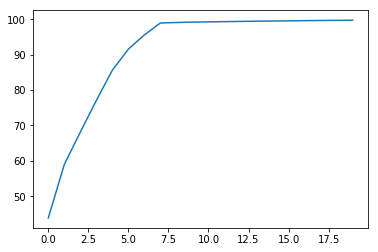

In [64]:
plt.plot(var1)

In [65]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

7

In [66]:
pca = PCA(n_components=7)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

### Logistic Regression Classifier

Logistic regression is a regression analysis to conduct when the dependent variable is dichotomous (binary). Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables. 

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
logr_parameter_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty': ['l1','l2']}

In [69]:
logr_grid_search = GridSearchCV(LogisticRegression(random_state = 8), logr_parameter_grid, cv=5, scoring='roc_auc', n_jobs = -1)
logr_grid_search.fit(x_train_pca, y_train)
print("Best Parameters : {}".format(logr_grid_search.best_params_))
print("Best cross_val score : {}".format(logr_grid_search.best_score_))

Best Parameters : {'C': 100, 'penalty': 'l2'}
Best cross_val score : 0.9411153127857318


In [70]:
logr_accuracy_train = logr_grid_search.best_estimator_.score(x_train_pca, y_train)
logr_accuracy_test = logr_grid_search.best_estimator_.score(x_test_pca, y_test)

print('Logistic Regression - Train Accuracy: %.2f'%logr_accuracy_train)
print('Logistic Regression - Test Accuracy: %.2f '%logr_accuracy_test)

Logistic Regression - Train Accuracy: 0.93
Logistic Regression - Test Accuracy: 0.92 


In [71]:
logr_auc_train = roc_auc_score(y_train,logr_grid_search.predict(x_train_pca))
logr_auc_test = roc_auc_score(y_test,logr_grid_search.predict(x_test_pca))

print('Logistic Regression - Train roc_auc_score: %.2f'%logr_auc_train)
print('Logistic Regression - Test roc_auc_score: %.2f '%logr_auc_test)

Logistic Regression - Train roc_auc_score: 0.81
Logistic Regression - Test roc_auc_score: 0.82 


In [72]:
report_table = [['Logistic Regression', 'C = 100; penalty = l2', logr_accuracy_train, logr_accuracy_test, logr_auc_train, logr_auc_test]]

### KNN Classifier

K Nearest Neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). It is essentially classification by finding the most similar data points in the training data, and making an educated guess based on their classifications.

In [73]:
knn_parameter_grid = {'n_neighbors': list(np.arange(1,11))}

In [74]:
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_parameter_grid, cv=5, scoring='roc_auc', n_jobs = -1)
knn_grid_search.fit(x_train_pca, y_train)
print("Best Parameters : {}".format(knn_grid_search.best_params_))
print("Best cross_val score : {}".format(knn_grid_search.best_score_))

Best Parameters : {'n_neighbors': 10}
Best cross_val score : 0.9686861780787911


In [75]:
knn_accuracy_train = knn_grid_search.best_estimator_.score(x_train_pca, y_train)
knn_accuracy_test = knn_grid_search.best_estimator_.score(x_test_pca, y_test)

print('K Neighbors Classifier - Train Accuracy: %.2f'%knn_accuracy_train)
print('K Neighbors Classifier - Test Accuracy: %.2f '%knn_accuracy_test)

K Neighbors Classifier - Train Accuracy: 0.95
K Neighbors Classifier - Test Accuracy: 0.94 


In [76]:
knn_auc_train = roc_auc_score(y_train,knn_grid_search.predict(x_train_pca))
knn_auc_test = roc_auc_score(y_test,knn_grid_search.predict(x_test_pca))

print('Logistic Regression - Train roc_auc_score: %.2f'%knn_auc_train)
print('Logistic Regression - Test roc_auc_score: %.2f '%knn_auc_test)

Logistic Regression - Train roc_auc_score: 0.90
Logistic Regression - Test roc_auc_score: 0.90 


In [77]:
report_table = report_table + [['K Neighbors Classifier', 'n_neighbors = 10', knn_accuracy_train, knn_accuracy_test, knn_auc_train, knn_auc_test]]

### Linear Support Vector Machine Classifier

The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. After getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is.

In [78]:
from sklearn.svm import LinearSVC

In [79]:
linsvm_param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

In [80]:
linsvm_grid_search = GridSearchCV(LinearSVC(random_state = 8),linsvm_param_grid, cv=5, scoring='roc_auc', n_jobs = -1)
linsvm_grid_search.fit(x_train_pca, y_train)
print("Best Parameters : {}".format(linsvm_grid_search.best_params_))
print("Best cross_val score : {}".format(linsvm_grid_search.best_score_))

Best Parameters : {'C': 10}
Best cross_val score : 0.9429276618937009


In [81]:
linsvm_accuracy_train = linsvm_grid_search.best_estimator_.score(x_train_pca, y_train)
linsvm_accuracy_test = linsvm_grid_search.best_estimator_.score(x_test_pca, y_test)

print('Linear Support Vector Machine Classifier - Train Accuracy: %.2f'%linsvm_accuracy_train)
print('Linear Support Vector Machine Classifier - Test Accuracy: %.2f '%linsvm_accuracy_test)

Linear Support Vector Machine Classifier - Train Accuracy: 0.91
Linear Support Vector Machine Classifier - Test Accuracy: 0.91 


In [82]:
linsvm_auc_train = roc_auc_score(y_train,linsvm_grid_search.predict(x_train_pca))
linsvm_auc_test = roc_auc_score(y_test,linsvm_grid_search.predict(x_test_pca))

print('Linear Support Vector Machine Classifier - Train roc_auc_score: %.2f'%linsvm_auc_train)
print('Linear Support Vector Machine Classifier - Test roc_auc_score: %.2f '%linsvm_auc_test)

Linear Support Vector Machine Classifier - Train roc_auc_score: 0.77
Linear Support Vector Machine Classifier - Test roc_auc_score: 0.78 


In [83]:
report_table = report_table + [['Linear Support Vector Machine Classifier', 'C = 10', linsvm_accuracy_train, linsvm_accuracy_test, linsvm_auc_train, linsvm_auc_test]]

### Kernel SVC

In case of non-linearly separable data, the simple SVM algorithm cannot be used. Rather, a modified version of SVM, called Kernel SVM, is used. Kernel SVM projects the non-linearly separable data lower dimensions to linearly separable data in higher dimensions in such a way that data points belonging to different classes are allocated to different dimensions

### Kernel (Linear) Support Vector Machine Classifier

In [84]:
from sklearn.svm import SVC

In [85]:
svm_param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

In [86]:
svm_grid_search = GridSearchCV(SVC(kernel = 'linear', random_state = 8),svm_param_grid, cv=5, scoring='roc_auc', n_jobs = -1)
svm_grid_search.fit(x_train_pca, y_train)
print("Best Parameters : {}".format(svm_grid_search.best_params_))
print("Best cross_val score : {}".format(svm_grid_search.best_score_))

Best Parameters : {'C': 1}
Best cross_val score : 0.9408404470911372


In [87]:
svm_accuracy_train = svm_grid_search.best_estimator_.score(x_train_pca, y_train)
svm_accuracy_test = svm_grid_search.best_estimator_.score(x_test_pca, y_test)

print('Linear Kernalized Support Vector Machine Classifier - Train Accuracy: %.2f'%svm_accuracy_train)
print('Linear Kernalized Support Vector Machine Classifier - Test Accuracy: %.2f '%svm_accuracy_test)

Linear Kernalized Support Vector Machine Classifier - Train Accuracy: 0.83
Linear Kernalized Support Vector Machine Classifier - Test Accuracy: 0.81 


In [88]:
svm_auc_train = roc_auc_score(y_train,svm_grid_search.predict(x_train_pca))
svm_auc_test = roc_auc_score(y_test,svm_grid_search.predict(x_test_pca))

print('Linear Kernalized Support Vector Machine Classifier - Train roc_auc_score: %.2f'%svm_auc_train)
print('Linear Kernalized Support Vector Machine Classifier - Test roc_auc_score: %.2f '%svm_auc_test)

Linear Kernalized Support Vector Machine Classifier - Train roc_auc_score: 0.55
Linear Kernalized Support Vector Machine Classifier - Test roc_auc_score: 0.55 


In [89]:
report_table = report_table + [['Kernel (Linear) Support Vector Machine Classifier', 'C = 1', svm_accuracy_train, svm_accuracy_test, svm_auc_train, svm_auc_test]]

### Kernel (Poly) Support Vector Machine Classifier

In [90]:
from sklearn.svm import SVC

In [91]:
psvm_param_grid = {'C':[ 0.001, 0.01, 0.1, 1, 10, 100],'degree' : [2, 3], 'gamma' : [0.01, 0.1]}

psvm_grid_search = GridSearchCV(SVC(kernel = 'poly', random_state = 8),psvm_param_grid, cv=5, scoring='roc_auc', n_jobs = -1)
psvm_grid_search.fit(x_train_pca, y_train)
print("Best Parameters : {}".format(psvm_grid_search.best_params_))
print("Best cross_val score : {}".format(psvm_grid_search.best_score_))

Best Parameters : {'C': 100, 'degree': 2, 'gamma': 0.1}
Best cross_val score : 0.9267098172691762


In [92]:
psvm_accuracy_train = psvm_grid_search.best_estimator_.score(x_train_pca, y_train)
psvm_accuracy_test = psvm_grid_search.best_estimator_.score(x_test_pca, y_test)

print('Poly Kerenilzed Support Vector Machine Classifier - Train Accuracy: %.2f'%psvm_accuracy_train)
print('Poly Kerenilzed Support Vector Machine Classifier - Test Accuracy: %.2f '%psvm_accuracy_test)

Poly Kerenilzed Support Vector Machine Classifier - Train Accuracy: 0.81
Poly Kerenilzed Support Vector Machine Classifier - Test Accuracy: 0.79 


In [93]:
psvm_auc_train = roc_auc_score(y_train,psvm_grid_search.predict(x_train_pca))
psvm_auc_test = roc_auc_score(y_test,psvm_grid_search.predict(x_test_pca))

print('Poly Kerenilzed Support Vector Machine Classifier - Train roc_auc_score: %.2f'%psvm_auc_train)
print('Poly Kerenilzed Support Vector Machine Classifier - Test roc_auc_score: %.2f '%psvm_auc_test)

Poly Kerenilzed Support Vector Machine Classifier - Train roc_auc_score: 0.50
Poly Kerenilzed Support Vector Machine Classifier - Test roc_auc_score: 0.50 


In [94]:
report_table = report_table + [['Kernel (Poly) Support Vector Machine Classifier', 'C = 100, degree = 2, gamma = 0.1', psvm_accuracy_train, psvm_accuracy_test, psvm_auc_train, psvm_auc_test]]

### Kernel (RBF) Support Vector Machine Classifier

In [95]:
rsvm_param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}

In [96]:
rsvm_grid_search = GridSearchCV(SVC(kernel = 'rbf', random_state = 8),rsvm_param_grid, cv=5, scoring='roc_auc', n_jobs = -1)
rsvm_grid_search.fit(x_train_pca, y_train)
print("Best Parameters : {}".format(rsvm_grid_search.best_params_))
print("Best cross_val score : {}".format(rsvm_grid_search.best_score_))

Best Parameters : {'C': 100, 'gamma': 100}
Best cross_val score : 0.9703740014489008


In [97]:
rsvm_accuracy_train = rsvm_grid_search.best_estimator_.score(x_train_pca, y_train)
rsvm_accuracy_test = rsvm_grid_search.best_estimator_.score(x_test_pca, y_test)

print('RBF Kerenilzed Support Vector Machine Classifier - Train Accuracy: %.2f'%rsvm_accuracy_train)
print('RBF Kerenilzed Support Vector Machine Classifier - Test Accuracy: %.2f '%rsvm_accuracy_test)

RBF Kerenilzed Support Vector Machine Classifier - Train Accuracy: 0.95
RBF Kerenilzed Support Vector Machine Classifier - Test Accuracy: 0.95 


In [98]:
rsvm_auc_train = roc_auc_score(y_train,rsvm_grid_search.predict(x_train_pca))
rsvm_auc_test = roc_auc_score(y_test,rsvm_grid_search.predict(x_test_pca))

print('RBF Kerenilzed Support Vector Machine Classifier - Train roc_auc_score: %.2f'%rsvm_auc_train)
print('RBF Kerenilzed Support Vector Machine Classifier - Test roc_auc_score: %.2f '%rsvm_auc_test)

RBF Kerenilzed Support Vector Machine Classifier - Train roc_auc_score: 0.89
RBF Kerenilzed Support Vector Machine Classifier - Test roc_auc_score: 0.90 


In [99]:
report_table = report_table + [['Kernel (RBF) Support Vector Machine Classifier', 'C = 100, gamma = 100', rsvm_accuracy_train, rsvm_accuracy_test, rsvm_auc_train, rsvm_auc_test]]

### Decision Tree Classifier

Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dt_param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10],'max_features':[1,2,3,4,5,6,7]}

In [102]:
dt_grid_search= GridSearchCV( DecisionTreeClassifier(random_state = 8),dt_param_grid, cv=5, scoring='roc_auc', n_jobs = -1)
dt_grid_search.fit(x_train_pca, y_train)
print("Best Parameters : {}".format(dt_grid_search.best_params_))
print("Best cross_val score : {}".format(dt_grid_search.best_score_))

Best Parameters : {'max_depth': 5, 'max_features': 6}
Best cross_val score : 0.9605697717927967


In [103]:
dt_accuracy_train = dt_grid_search.best_estimator_.score(x_train_pca, y_train)
dt_accuracy_test = dt_grid_search.best_estimator_.score(x_test_pca, y_test)

print('Decision Tree Classifier - Train Accuracy: %.2f'%dt_accuracy_train)
print('Decision Tree Classifier - Test Accuracy: %.2f '%dt_accuracy_test)

Decision Tree Classifier - Train Accuracy: 0.95
Decision Tree Classifier - Test Accuracy: 0.94 


In [104]:
dt_auc_train = roc_auc_score(y_train,dt_grid_search.predict(x_train_pca))
dt_auc_test = roc_auc_score(y_test,dt_grid_search.predict(x_test_pca))

print('Decision Tree Classifier - Train roc_auc_score: %.2f'%dt_auc_train)
print('Decision Tree Classifier - Test roc_auc_score: %.2f '%dt_auc_test)

Decision Tree Classifier - Train roc_auc_score: 0.89
Decision Tree Classifier - Test roc_auc_score: 0.89 


In [105]:
report_table = report_table + [['Decision Tree Classifier', 'max_depth = 5; max_features = 6', dt_accuracy_train, dt_accuracy_test, dt_auc_train, dt_auc_test]]

### Report Table - Without PCA

In [106]:
proj2=pd.DataFrame({'Model Name':['Logistic Regression','K Neighbors Classifier','Linear Support Vectro Machine','Kernel (Linear) Support Vector Machine','Kernel (Poly) Support Vector Machine','Kernel (RBF) Support Vector Machine','Decision Tree Classifier'],' Model Parameters':["C=10; penalty=l1","n_neighbors=10","C=10","C=100","C=10; degree=2; gamma=0.01","C=100; gamma=0.01","max_depth=4; max=feature=5"],'Train Accuracy':[0.966240,0.964641,0.965885,0.966151,0.966063,0.960288,0.966951],'Test Accuracy':[0.965187,0.959503,0.965187,0.965187,0.964831,0.961634,0.961989],'Train AUC Score':[0.933635,0.924940,0.928934,0.933401,0.930837,0.914366,0.950565],'Test AUC Score':[0.934352,0.921543,0.931898,0.934966,0.934741,0.927804,0.945824]})
proj2

,Model Name,Model Parameters,Train Accuracy,Test Accuracy,Train AUC Score,Test AUC Score
0,Logistic Regression,C=10; penalty=l1,0.966240,0.965187,0.933635,0.934352
1,K Neighbors Classifier,n_neighbors=10,0.964641,0.959503,0.924940,0.921543
2,Linear Support Vectro Machine,C=10,0.965885,0.965187,0.928934,0.931898
3,Kernel (Linear) Support Vector Machine,C=100,0.966151,0.965187,0.933401,0.934966
4,Kernel (Poly) Support Vector Machine,C=10; degree=2; gamma=0.01,0.966063,0.964831,0.930837,0.934741
5,Kernel (RBF) Support Vector Machine,C=100; gamma=0.01,0.960288,0.961634,0.914366,0.927804
6,Decision Tree Classifier,max_depth=4; max=feature=5,0.966951,0.961989,0.950565,0.945824


### Report Table - With PCA

In [107]:
report = pd.DataFrame(report_table,columns = ['Model Name', 'Model Parameters', 'Train Accuracy', 'Test Accuracy', 'Train AUC Score', 'Test AUC Score'])
report.index = report['Model Name']

In [108]:
report

,Model Name,Model Parameters,Train Accuracy,Test Accuracy,Train AUC Score,Test AUC Score
Model Name,,,,,,
Logistic Regression,Logistic Regression,C = 100; penalty = l2,0.925640,0.919716,0.812140,0.819607
K Neighbors Classifier,K Neighbors Classifier,n_neighbors = 10,0.953358,0.944583,0.904175,0.899194
Linear Support Vector Machine Classifier,Linear Support Vector Machine Classifier,C = 10,0.912491,0.905506,0.774448,0.779914
Kernel (Linear) Support Vector Machine Classifier,Kernel (Linear) Support Vector Machine Classifier,C = 1,0.830757,0.810302,0.554073,0.552013
Kernel (Poly) Support Vector Machine Classifier,Kernel (Poly) Support Vector Machine Classifier,"C = 100, degree = 2, gamma = 0.1",0.809613,0.786856,0.500154,0.499099
Kernel (RBF) Support Vector Machine Classifier,Kernel (RBF) Support Vector Machine Classifier,"C = 100, gamma = 100",0.948650,0.945293,0.893919,0.897804
Decision Tree Classifier,Decision Tree Classifier,max_depth = 5; max_features = 6,0.946873,0.942096,0.886190,0.889640


### Comparison - Results before applying PCA and after applying PCA

K Neighbors Classifier is the best classification model after applying PCA. It has the highest train and test scores among all the models

PCA helps in handling the dimensionality problem in data by reducing the numder of dimensions in the dataset and also retaining the characteristics of the original dataset. 

But in our case, both the accuracy scores (train and test) and AUC scores (train and test) have reduced after applying PCA. Thus, PCA has reduced the performance of the models eventhough it has handled the dimensionality problem in the dataset.

Also, interpretation of coefficients of features is not starightforward after PCA is applied

### Train Test AUC Score Plot - After Applying PCA

In [118]:
report['identifier'] = report.index
report['identifier'] = report.identifier.apply(lambda x: str(x).replace('Classifier','').replace('Support Vector Machine','SVM'))

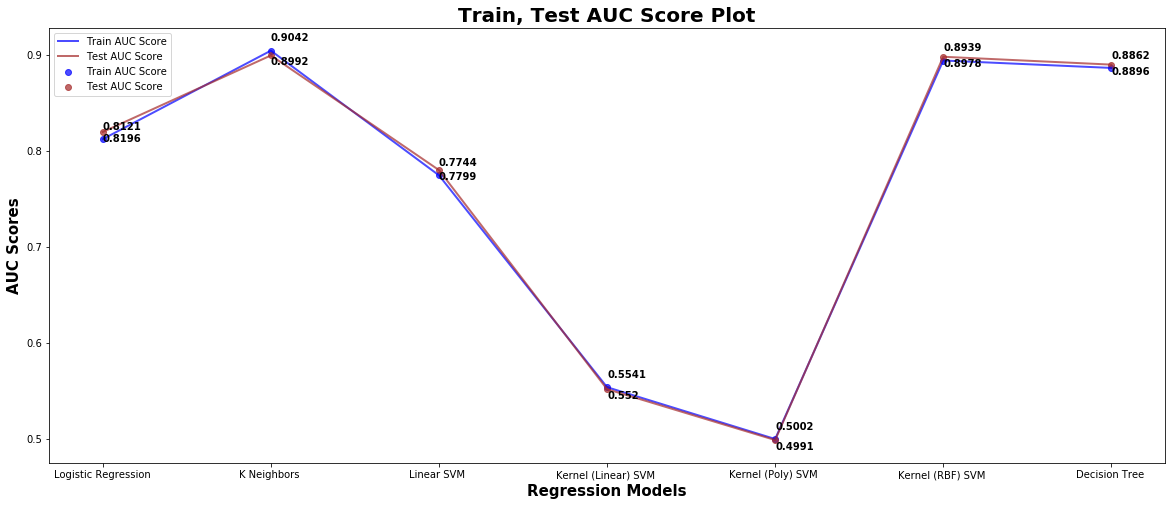

In [121]:
%matplotlib inline
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111,facecolor='white')
opacity=0.7
ax.plot(report['identifier'], report['Train AUC Score'], c = 'blue',linewidth=2,alpha=opacity)
ax.plot(report['identifier'], report['Test AUC Score'], c = 'brown',linewidth=2,alpha=opacity)
ax.scatter(report['identifier'], report['Train AUC Score'], c = 'blue',alpha=opacity)
ax.scatter(report['identifier'], report['Test AUC Score'], c = 'brown',alpha=opacity)
for i,j in zip(report['identifier'],round(report['Train AUC Score'],4)):
    ax.annotate(str(j),xy=(i,j+0.01),color='black',weight='bold')
for i,j in zip(report['identifier'],round(report['Test AUC Score'],4)):
    ax.annotate(str(j),xy=(i,j-0.01),color='black',weight='bold')
ax.legend()
ax.set_title('Train, Test AUC Score Plot',fontsize=20,weight='bold')
ax.set_xlabel('Regression Models',fontsize=15,weight='bold')
ax.set_ylabel('AUC Scores',fontsize=15,weight='bold')
handles, labels = ax.get_legend_handles_labels()
plt.show()

### Deep Learning Model

Deep Learning is a subfield of machine learning concerned with algorithms inspired by the structure and function of the brain called artificial neural networks.

Neural network is a computing system made up of a number of simple, highly interconnected processing elements, which process information by their dynamic state response to external inputs.

Most deep learning methods use neural network architectures, which is why deep learning models are often referred to as deep neural networks.

In [109]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

# fix random seed for reproducibility
numpy.random.seed(10)

Using TensorFlow backend.


In [110]:
# Create Model
model = Sequential()
model.add(Dense(12, input_dim=d, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [111]:
#Complile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [112]:
#Fit the model
model.fit(x_train_pca, y_train, epochs = 150, batch_size = 20)

Epoch 1/150
11256/11256 [==============================] - 1s 121us/step - loss: 0.4746 - acc: 0.7998
Epoch 2/150
11256/11256 [==============================] - 1s 77us/step - loss: 0.4190 - acc: 0.8107
Epoch 3/150
11256/11256 [==============================] - 1s 81us/step - loss: 0.3852 - acc: 0.8225
Epoch 4/150
11256/11256 [==============================] - 1s 76us/step - loss: 0.3372 - acc: 0.8531
Epoch 5/150
11256/11256 [==============================] - 1s 59us/step - loss: 0.2961 - acc: 0.8776
Epoch 6/150
11256/11256 [==============================] - 1s 58us/step - loss: 0.2666 - acc: 0.8956
Epoch 7/150
11256/11256 [==============================] - 1s 57us/step - loss: 0.2445 - acc: 0.9072
Epoch 8/150
11256/11256 [==============================] - 1s 57us/step - loss: 0.2290 - acc: 0.9157
Epoch 9/150
11256/11256 [==============================] - 1s 72us/step - loss: 0.2169 - acc: 0.9222
Epoch 10/150
11256/11256 [==============================] - 1s 96us/step - loss: 0.2079 - 

In [113]:
# Evaluate the Model
scores = model.evaluate(x_test_pca, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2815/2815 [==============================] - 0s 46us/step

acc: 94.17%


In [114]:
y_predict = model.predict(x_test_pca)
y_predict

array([[5.5425853e-04],
       [4.6129379e-02],
       [1.9852689e-02],
       ...,
       [7.0088297e-02],
       [9.9982506e-01],
       [1.4629130e-02]], dtype=float32)

Applying Deep Learning model for this classification dataset gives an accuracy of 94.17% after applying PCA